In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

/home/hzh/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#
from nets.Unet_kaggle import Unet_Kaggle as Net

mynet = Net()
model = mynet.load_model()

reload model configuration and weight
using net nets.Unet_kaggle


In [3]:
# test image
img_s = load_img('./img/0test.png', grayscale=True)
img = img_to_array(img_s)

# for display
img_0 = np.squeeze(img)

# preparing data for prediction
img1 = np.expand_dims(img, axis=0)
img1=img1.astype('float32')
img1 /= 255

# predicting
pred = model.predict(img1)
print(pred.shape)

(1, 512, 512, 1)


Text(0.5,1,'pred')

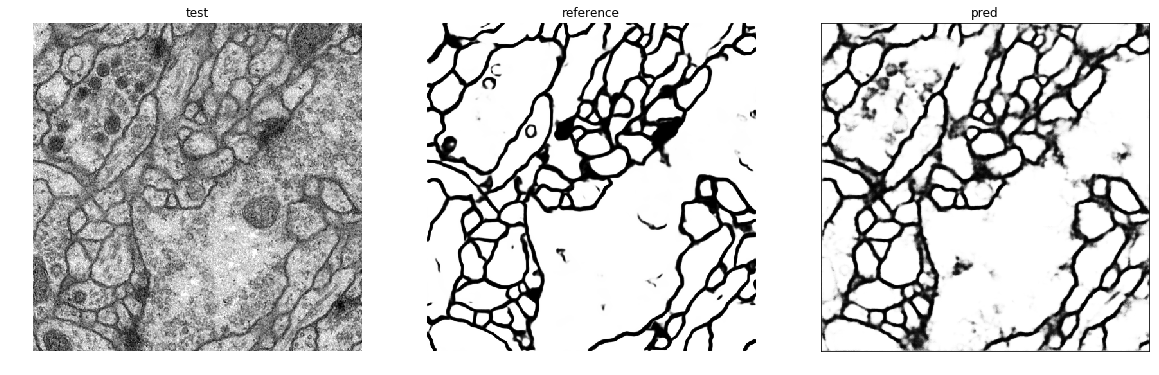

In [4]:
plt.figure(figsize=(20, 10))

# test image
plt.subplot(1, 3, 1)
plt.imshow(img_0, cmap='gray')
plt.axis('off')
plt.title('test')

# reference label
img_s = load_img('./img/0label.png', grayscale=True)
img_l=img_to_array(img_s)
# for display
img_0_l=np.squeeze(img_l)

#
plt.subplot(1, 3, 2)
plt.imshow(img_0_l, cmap='gray')
plt.axis('off')
plt.title('reference')

# predicted label
img_0_p=np.squeeze(pred)

#
plt.subplot(1, 3, 3)
plt.imshow(img_0_p, cmap='gray')
plt.xticks([])   # Note: this displays bounding box, unlike plt.axis('off')
plt.yticks([])
plt.title('pred')

In [5]:
# 
test_data = './data/test/5.tif'

# test image
img_s = load_img(test_data, grayscale=True)
img = img_to_array(img_s)

# for display
img_0 = np.squeeze(img)

# preparing data for prediction
img1 = np.expand_dims(img, axis=0)
img1=img1.astype('float32')
img1 /= 255

# predicting
pred = model.predict(img1)
print(pred.shape)

(1, 512, 512, 1)


(-0.5, 511.5, 511.5, -0.5)

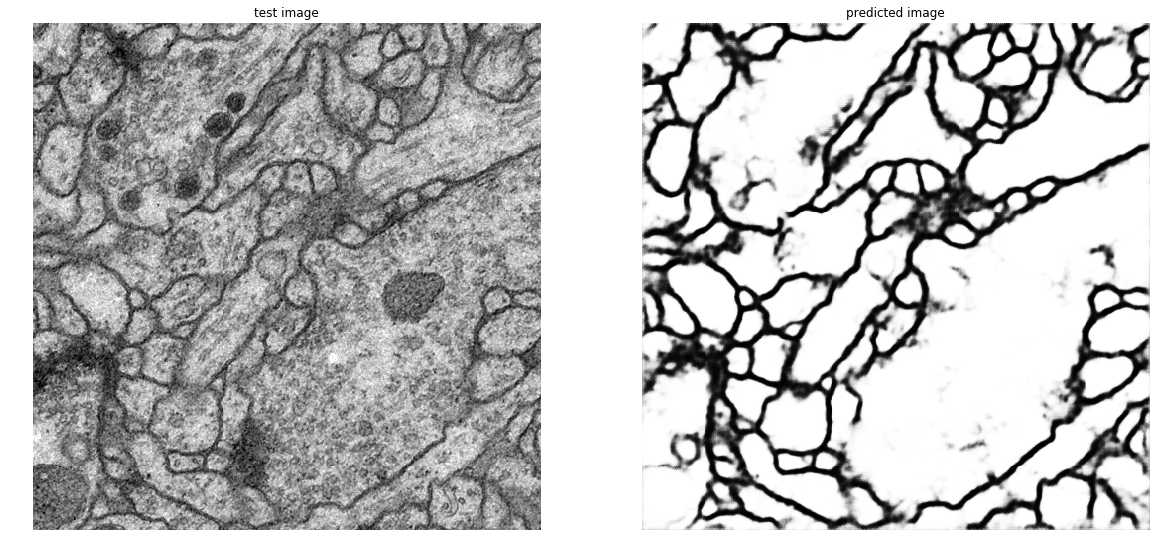

In [6]:
plt.figure(figsize=(20, 10))

# original image
plt.subplot(121)
plt.imshow(img_0, cmap='gray')
plt.title('test image')
plt.axis('off')

# predicting image
img_0_p=np.squeeze(pred)

#
plt.subplot(122)
plt.imshow(img_0_p, cmap='gray')
plt.title('predicted image')
plt.axis('off')